# IMPORT

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

# Load Data

In [121]:
df = pd.read_csv('/home/rovik/Dropbox/Studie/IBE405 Cyber-physical Systems and Smart Cities/ibe405-project/data/rawData2.csv')
df2 = pd.read_json('/home/rovik/Dropbox/Studie/IBE405 Cyber-physical Systems and Smart Cities/ibe405-project/data/weatherdata_29.11.21.json')

# Prepare Dataset

## Arduino Data

Make sure all columns are lowercase and change date to datetime datatype to ensure compatability with weatherdate.

In [122]:
df.columns = map(str.lower, df.columns) 
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,time,temperature,humidity,luminosity
0,2021-11-04,18:00:00,21.5,34.1,very bright
1,2021-11-04,18:00:00,21.5,17.5,very bright
2,2021-11-04,18:00:00,21.5,35.6,very bright
3,2021-11-04,18:00:00,21.6,35.2,very bright
4,2021-11-04,18:00:00,21.6,34.6,very bright


In [123]:
df.describe()

,temperature,humidity
count,8846.000000,8846.000000
mean,20.887384,36.175424
std,0.433069,2.952191
min,19.900000,17.500000
25%,20.600000,34.800000
50%,20.800000,36.500000
75%,21.200000,37.900000
max,22.300000,45.000000


In [124]:
df.isna().sum()

date           0
time           0
temperature    0
humidity       0
luminosity     3
dtype: int64

Since there is only 1 NaN value in our categorical data readings and the API weather data only has 1 reading per hour, we simply drop this value as it will have little impact on the whole.

In [125]:
df.dropna(axis=0, inplace=True)

-----

## API Weather Data

In [126]:
df2.head()

,_id,air_pressure_at_sea_level,air_temperature,air_temperature_percentile_10,air_temperature_percentile_90,cloud_area_fraction,cloud_area_fraction_high,cloud_area_fraction_low,cloud_area_fraction_medium,dew_point_temperature,fog_area_fraction,relative_humidity,ultraviolet_index_clear_sky,wind_from_direction,wind_speed,wind_speed_of_gust,wind_speed_percentile_10,wind_speed_percentile_90,time,date
0,2021-11-03T14:00:00Z,1001.5,8.4,7.6,9.1,0.0,0.0,0.0,0.0,3.1,0.0,70.1,0.1,53.5,0.9,1.9,0.5,1.0,14:00:00,2021-11-03
1,2021-11-03T15:00:00Z,1001.8,7.3,6.4,8.1,0.0,0.0,0.0,0.0,2.7,0.0,73.1,0.0,14.2,1.5,2.1,1.3,1.8,15:00:00,2021-11-03
2,2021-11-03T16:00:00Z,1002.1,6.5,5.5,7.3,0.0,0.0,0.0,0.0,1.9,0.0,73.5,0.0,42.5,1.9,2.6,1.3,2.2,16:00:00,2021-11-03
3,2021-11-03T17:00:00Z,1002.7,6.0,5.0,6.9,0.0,0.0,0.0,0.0,2.2,0.0,77.6,0.0,39.7,1.9,2.7,1.1,2.4,17:00:00,2021-11-03
4,2021-11-03T18:00:00Z,1003.2,5.5,4.7,6.3,0.1,0.0,0.1,0.0,2.3,0.0,80.6,0.0,42.2,2.4,3.6,1.4,2.4,18:00:00,2021-11-03


In [127]:
df2.describe()

,air_pressure_at_sea_level,air_temperature,air_temperature_percentile_10,air_temperature_percentile_90,cloud_area_fraction,cloud_area_fraction_high,cloud_area_fraction_low,cloud_area_fraction_medium,dew_point_temperature,fog_area_fraction,relative_humidity,ultraviolet_index_clear_sky,wind_from_direction,wind_speed,wind_speed_of_gust,wind_speed_percentile_10,wind_speed_percentile_90
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,1007.692456,3.806260,3.031461,4.587319,72.806260,43.898074,48.874478,43.490048,-0.125843,0.090369,77.264848,0.033066,192.922953,4.392295,7.430016,3.226003,4.993258
std,7.673958,4.080777,4.059217,4.029364,36.228412,43.538301,39.740691,40.032021,5.407348,0.600244,12.857235,0.070811,110.390953,3.054516,4.918750,2.571067,2.974947
min,992.500000,-7.800000,-8.500000,-7.000000,0.000000,0.000000,0.000000,0.000000,-15.600000,0.000000,43.300000,0.000000,2.200000,0.200000,1.400000,0.200000,0.800000
25%,1003.000000,2.500000,1.700000,3.300000,55.000000,0.000000,0.150000,0.900000,-2.700000,0.000000,66.800000,0.000000,47.050000,2.100000,3.600000,1.300000,2.600000
50%,1005.800000,4.600000,3.800000,5.400000,92.800000,27.500000,56.800000,35.300000,1.500000,0.000000,78.900000,0.000000,242.500000,3.300000,5.800000,2.300000,4.300000
75%,1013.300000,6.400000,5.600000,7.100000,99.900000,95.350000,88.400000,86.150000,3.700000,0.000000,88.750000,0.000000,267.700000,5.900000,10.300000,4.600000,6.700000
max,1026.900000,12.400000,11.600000,13.100000,100.000000,100.000000,100.000000,100.000000,8.000000,9.900000,98.500000,0.300000,359.800000,16.000000,25.800000,13.500000,16.000000


Drop _id which is an artefact from the database indexing, and we already have date and time columns to work with if needed.

In [128]:
df2.drop(["_id"], axis=1, inplace=True)
df2.isna().sum()

air_pressure_at_sea_level        0
air_temperature                  0
air_temperature_percentile_10    0
air_temperature_percentile_90    0
cloud_area_fraction              0
cloud_area_fraction_high         0
cloud_area_fraction_low          0
cloud_area_fraction_medium       0
dew_point_temperature            0
fog_area_fraction                0
relative_humidity                0
ultraviolet_index_clear_sky      0
wind_from_direction              0
wind_speed                       0
wind_speed_of_gust               0
wind_speed_percentile_10         0
wind_speed_percentile_90         0
time                             0
date                             0
dtype: int64

# Merge Datasets

Since arduino collects data every 2 minutes and the weatherdata API only gives us a reading every hour, we want to only have one entry from arduino and one from weather api.
We considered using a mean value for the arduino readings per hour, then combining, but would make luminosity wildly inaccurate as this reports whether the lights in the room are currently on or off.

In [129]:
df.drop_duplicates(subset=["date", "time"], keep="last", inplace=True)

In [130]:
merged_df = df.merge(df2)
merged_df

,date,time,temperature,humidity,luminosity,air_pressure_at_sea_level,air_temperature,air_temperature_percentile_10,air_temperature_percentile_90,cloud_area_fraction,...,cloud_area_fraction_medium,dew_point_temperature,fog_area_fraction,relative_humidity,ultraviolet_index_clear_sky,wind_from_direction,wind_speed,wind_speed_of_gust,wind_speed_percentile_10,wind_speed_percentile_90
0,2021-11-04,18:00:00,21.3,33.8,pitch black,1008.7,4.4,3.6,5.1,93.9,...,47.2,3.7,0.0,95.7,0.0,344.6,1.0,1.7,0.5,1.8
1,2021-11-04,19:00:00,21.1,34.9,bright,1008.5,3.6,3.0,4.5,59.6,...,42.7,2.2,0.0,91.1,0.0,317.3,1.0,2.0,0.6,1.7
2,2021-11-04,20:00:00,21.3,35.4,pitch black,1008.2,5.0,4.4,5.8,97.2,...,67.4,3.1,0.0,88.2,0.0,263.8,1.0,1.8,1.0,2.6
3,2021-11-04,21:00:00,21.4,36.9,pitch black,1008.1,5.2,4.4,6.0,100.0,...,89.0,3.4,0.0,89.1,0.0,246.0,2.1,3.2,1.9,2.8
4,2021-11-04,22:00:00,21.5,35.7,bright,1008.3,6.3,5.4,6.9,99.0,...,86.6,4.2,0.0,87.1,0.0,254.3,4.0,6.0,2.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2021-11-16,20:00:00,21.1,36.4,very dark,1000.2,10.6,9.7,11.6,99.9,...,96.0,4.3,0.0,65.5,0.0,195.5,2.9,4.6,1.5,4.7
166,2021-11-16,21:00:00,21.4,36.0,very dark,999.2,12.4,11.6,13.1,99.9,...,96.8,5.1,0.0,61.5,0.0,236.0,5.4,8.9,4.7,6.7
167,2021-11-16,22:00:00,21.5,33.6,very dark,998.7,12.2,11.5,13.0,100.0,...,72.6,5.2,0.0,62.7,0.0,227.4,6.0,9.4,5.5,7.1
168,2021-11-16,23:00:00,21.6,36.8,very dark,999.0,11.1,10.5,12.0,98.1,...,90.0,4.9,0.0,65.6,0.0,222.9,5.9,9.8,5.9,6.8


# Exploring the data

/home/rovik/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensio

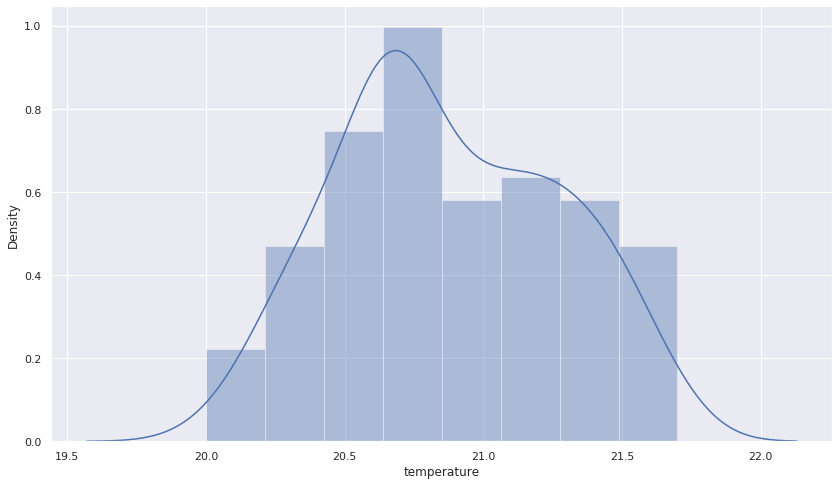

In [131]:
sns.set(rc={'figure.figsize':(14,8)})
sns.distplot(merged_df['temperature'])

Looking at temperature compared to air temperature it doesn't seem like they affect each other in any noticeable way.

In [132]:
merged_df[["temperature", "air_temperature"]].groupby(["temperature"], as_index=True).mean()

,air_temperature
temperature,
20.0,4.000000
20.1,4.950000
20.2,5.380000
20.3,5.133333
20.4,5.100000
20.5,6.483333
20.6,5.780000
20.7,5.738462
20.8,6.590000


We don't see any significant grouping of inside and outside temperature.

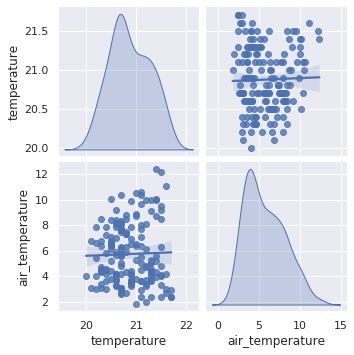

In [133]:
# sns.scatterplot(data=merged_df, x='temperature', y="air_temperature")
sns.pairplot(merged_df[["temperature", "air_temperature"]], kind="reg", diag_kind="kde")

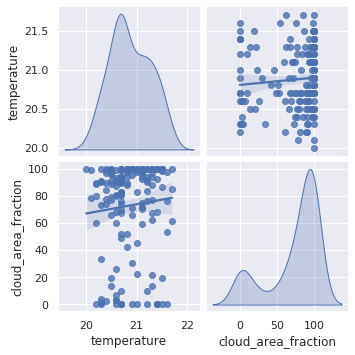

In [134]:
sns.pairplot(merged_df[["temperature", "cloud_area_fraction"]], kind="reg", diag_kind="kde")

# PREPROCESSING THE DATA

## Split Numerical and Categorical

In [135]:
df_num = merged_df.select_dtypes(include=[np.number])
df_cat = merged_df.select_dtypes(exclude=[np.number])

## Feature Engineering

In [136]:
df_cat.drop(["date", "time"], axis=1, inplace=True)

/home/rovik/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


There hasn't been any instance of fog during the time period.

In [137]:
df_num.drop(["fog_area_fraction"], axis=1, inplace=True)

## Imputation

No missing values

## Vectorization

In [138]:
df_cat = pd.get_dummies(df_cat, columns=["luminosity"], prefix=["luminosity"])
df_cat

,luminosity_bright,luminosity_dark,luminosity_dim,luminosity_pitch black,luminosity_very bright,luminosity_very dark
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
165,0,0,0,0,0,1
166,0,0,0,0,0,1
167,0,0,0,0,0,1
168,0,0,0,0,0,1


## Normalization

In [139]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler

scaler = MaxAbsScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df_num))
norm_df.columns = df_num.columns
norm_df.index = df_num.index
norm_df

,temperature,humidity,air_pressure_at_sea_level,air_temperature,air_temperature_percentile_10,air_temperature_percentile_90,cloud_area_fraction,cloud_area_fraction_high,cloud_area_fraction_low,cloud_area_fraction_medium,dew_point_temperature,relative_humidity,ultraviolet_index_clear_sky,wind_from_direction,wind_speed,wind_speed_of_gust,wind_speed_percentile_10,wind_speed_percentile_90
0,0.981567,0.754464,0.982277,0.354839,0.310345,0.389313,0.939,0.804,0.356784,0.472,0.415730,0.998956,0.000000,0.963108,0.073529,0.079439,0.043478,0.132353
1,0.972350,0.779018,0.982082,0.290323,0.258621,0.343511,0.596,0.095,0.422111,0.427,0.247191,0.950939,0.000000,0.886808,0.073529,0.093458,0.052174,0.125000
2,0.981567,0.790179,0.981790,0.403226,0.379310,0.442748,0.972,0.955,0.675377,0.674,0.348315,0.920668,0.000000,0.737283,0.073529,0.084112,0.086957,0.191176
3,0.986175,0.823661,0.981692,0.419355,0.379310,0.458015,1.000,0.853,0.981910,0.890,0.382022,0.930063,0.000000,0.687535,0.154412,0.149533,0.165217,0.205882
4,0.990783,0.796875,0.981887,0.508065,0.465517,0.526718,0.990,0.219,0.912563,0.866,0.471910,0.909186,0.000000,0.710732,0.294118,0.280374,0.200000,0.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.972350,0.812500,0.973999,0.854839,0.836207,0.885496,0.999,0.986,0.034171,0.960,0.483146,0.683716,0.000000,0.546395,0.213235,0.214953,0.130435,0.345588
166,0.986175,0.803571,0.973026,1.000000,1.000000,1.000000,0.999,1.000,0.138693,0.968,0.573034,0.641962,0.000000,0.659586,0.397059,0.415888,0.408696,0.492647
167,0.990783,0.750000,0.972539,0.983871,0.991379,0.992366,1.000,0.999,0.115578,0.726,0.584270,0.654489,0.000000,0.635551,0.441176,0.439252,0.478261,0.522059
168,0.995392,0.821429,0.972831,0.895161,0.905172,0.916031,0.981,0.891,0.249246,0.900,0.550562,0.684760,0.000000,0.622974,0.433824,0.457944,0.513043,0.500000


## Merge

In [140]:
# df = df_num.join(df_cat)
df = df_num
df

,temperature,humidity,air_pressure_at_sea_level,air_temperature,air_temperature_percentile_10,air_temperature_percentile_90,cloud_area_fraction,cloud_area_fraction_high,cloud_area_fraction_low,cloud_area_fraction_medium,dew_point_temperature,relative_humidity,ultraviolet_index_clear_sky,wind_from_direction,wind_speed,wind_speed_of_gust,wind_speed_percentile_10,wind_speed_percentile_90
0,21.3,33.8,1008.7,4.4,3.6,5.1,93.9,80.4,35.5,47.2,3.7,95.7,0.0,344.6,1.0,1.7,0.5,1.8
1,21.1,34.9,1008.5,3.6,3.0,4.5,59.6,9.5,42.0,42.7,2.2,91.1,0.0,317.3,1.0,2.0,0.6,1.7
2,21.3,35.4,1008.2,5.0,4.4,5.8,97.2,95.5,67.2,67.4,3.1,88.2,0.0,263.8,1.0,1.8,1.0,2.6
3,21.4,36.9,1008.1,5.2,4.4,6.0,100.0,85.3,97.7,89.0,3.4,89.1,0.0,246.0,2.1,3.2,1.9,2.8
4,21.5,35.7,1008.3,6.3,5.4,6.9,99.0,21.9,90.8,86.6,4.2,87.1,0.0,254.3,4.0,6.0,2.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,21.1,36.4,1000.2,10.6,9.7,11.6,99.9,98.6,3.4,96.0,4.3,65.5,0.0,195.5,2.9,4.6,1.5,4.7
166,21.4,36.0,999.2,12.4,11.6,13.1,99.9,100.0,13.8,96.8,5.1,61.5,0.0,236.0,5.4,8.9,4.7,6.7
167,21.5,33.6,998.7,12.2,11.5,13.0,100.0,99.9,11.5,72.6,5.2,62.7,0.0,227.4,6.0,9.4,5.5,7.1
168,21.6,36.8,999.0,11.1,10.5,12.0,98.1,89.1,24.8,90.0,4.9,65.6,0.0,222.9,5.9,9.8,5.9,6.8


## Correlation

In [141]:
df.drop(["air_temperature_percentile_10", "air_temperature_percentile_90", "wind_speed_percentile_10", "wind_speed_percentile_90"], axis=1, inplace=True)

/home/rovik/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [142]:
# plt.figure(figsize=(15,13))
# plt.title('Correlation')
# ax = sns.heatmap(df.corr(), vmax=1.0, annot=True, cmap="YlGnBu")
# plt.show()

# X and y

In [143]:
y = df["temperature"]
X = df.drop(["temperature"], axis=1)

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)

## Pairplot

In [145]:
# train_dataset = X_train.copy()
# train_dataset.insert(0, "temperature", y_train)
# sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

# Define and Implement Models

In [146]:
def mean_squared_error(y_true, y_pred): 
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

def median_absolute_error(y_true, y_pred):
    return np.sum(y_true - y_pred) / len(y_true)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2)) / (np.sum((y_true - np.mean(y_true)) ** 2))

## Linear Regression

In [153]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(f"MAE:\t{median_absolute_error(y_test, y_pred)}")
print(f"MSE:\t{mean_squared_error(y_test, y_pred)}")
print(f"RMSE:\t{root_mean_squared_error(y_test, y_pred)}")
print(f"R2:\t{r2_score(y_test, y_pred)}")
print(f"R2:\t{regressor.score(X_test, y_test)}")

MAE:	0.014291744061999762
MSE:	0.1123722835134127
RMSE:	0.3352197540620372
R2:	0.266180493551628
R2:	0.266180493551628


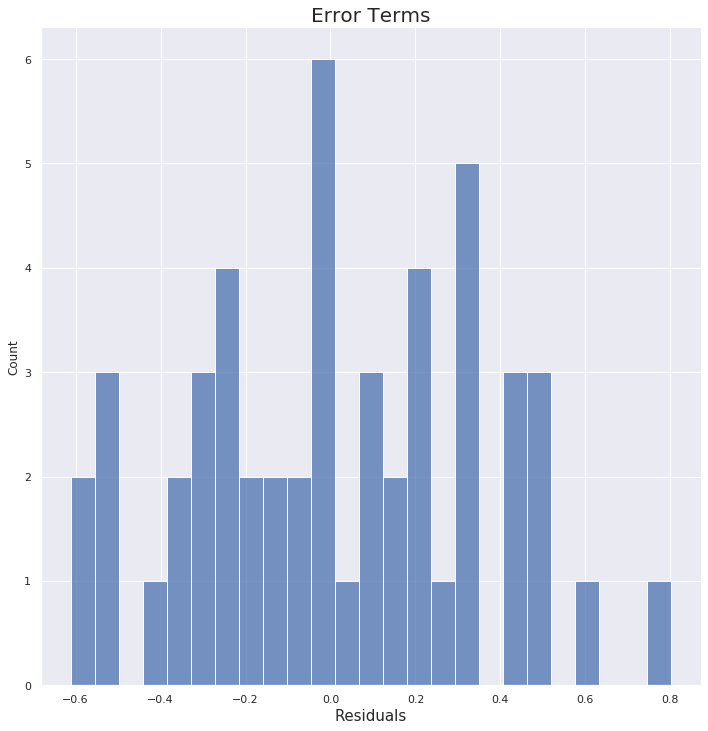

In [166]:
residuals = y_test - y_pred

sns.displot(residuals, bins=25, height=10)
plt.title("Error Terms", fontsize=20)
plt.xlabel("Residuals", fontsize=15)
plt.show()

In [149]:
coeff_df = pd.DataFrame(data=regressor.coef_, index=X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
humidity,0.002553
air_pressure_at_sea_level,-0.025195
air_temperature,0.313325
cloud_area_fraction,-0.001271
cloud_area_fraction_high,0.003201
cloud_area_fraction_low,0.000782
cloud_area_fraction_medium,0.000151
dew_point_temperature,-0.318771
relative_humidity,0.071991
ultraviolet_index_clear_sky,0.065330


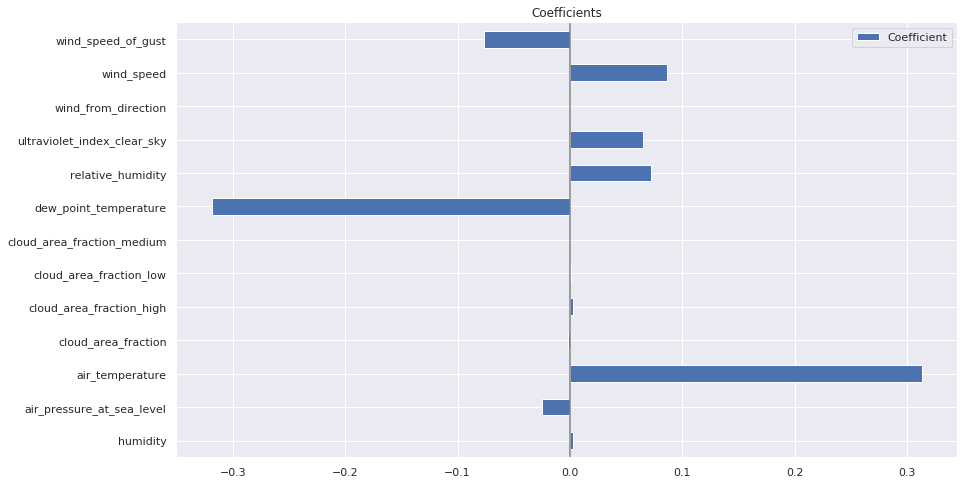

In [150]:
coeff_df.plot(kind="barh", figsize=(14, 8))
plt.title("Coefficients")
plt.axvline(x=0, color=".5")